In [1]:
#import Important Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale


In [2]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10
sns.set_style("whitegrid")

In [3]:
#imported data and scalled data for better and fast result
data=load_iris()
target=data.target
data=scale(data.data)
pd.DataFrame(target)
data

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522],
       [-1.5065,  0.7888, -1.3402, -1.1838],
       [-1.0218,  0.7888, -1.2834, -1.3154],
       [-1.7489, -0.3622, -1.3402, -1.3154],
       [-1.143 ,  0.0982, -1.2834, -1.4471],
       [-0.5372,  1.4794, -1.2834, -1.3154],
       [-1.2642,  0.7888, -1.2266, -1.3154],
       [-1.2642, -0.132 , -1.3402, -1.4471],
       [-1.87  , -0.132 , -1.5107, -1.4471],
       [-0.0525,  2.17  , -1.4539, -1.3154],
       [-0.1737,  3.0908, -1.2834, -1.0522],
       [-0.5372,  1.9398, -1.3971, -1.0522],
       [-0.9007,  1.019 , -1.3402, -1.1838],
       [-0.1737,  1.7096, -1.1697, -1.1838],
       [-0.9007,  1.7096, -1.2834, -1.1838],
       [-0.5372,  0.7888, -1.1697, -1.3154],
       [-0.9007,  1.4794, -1.2834, -1.0522],
       [-1

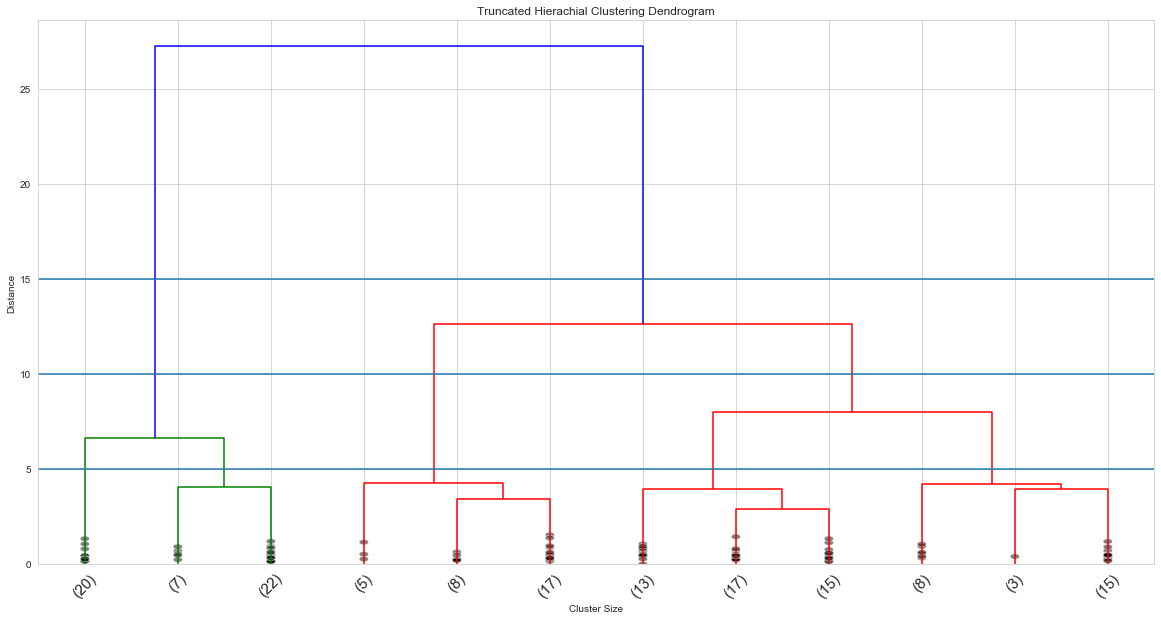

In [23]:
# 'z' is the type of linkage
z=linkage(data,'ward')
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

## Hack   :  For SPlitting Dengogram to cluster find the longest verical line that don't have any horizontal line Passed 

In [24]:
k=3
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(data)
sm.accuracy_score(target,Hclustering.labels_)

0.013333333333333334

In [22]:
k=3
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='single')
Hclustering.fit(data)
sm.accuracy_score(target,Hclustering.labels_)

0.0

In [40]:
k=4
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
Hclustering.fit(data)
sm.accuracy_score(target,Hclustering.labels_)

0.34

In [41]:
k=3
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
Hclustering.fit(data)
sm.accuracy_score(target,Hclustering.labels_)

0.6866666666666666

### I get the highest accuracy score of 0.68 when used Euclidean as affinity and the average as linkage parameters.  Thus It’s obvious that I will choose the third one as Hierarchal Clustering model for the Iris Dataset.



## Conclusion
### Hierarchical Clustering is a very good way to label the unlabeled dataset.  Hierarchical agglomerative clustering (HAC)  has a time complexity of O(n^3). Thus making it too slow. Therefore, the machine learning algorithm is good for the small dataset. Avoid it to apply it on the large dataset.